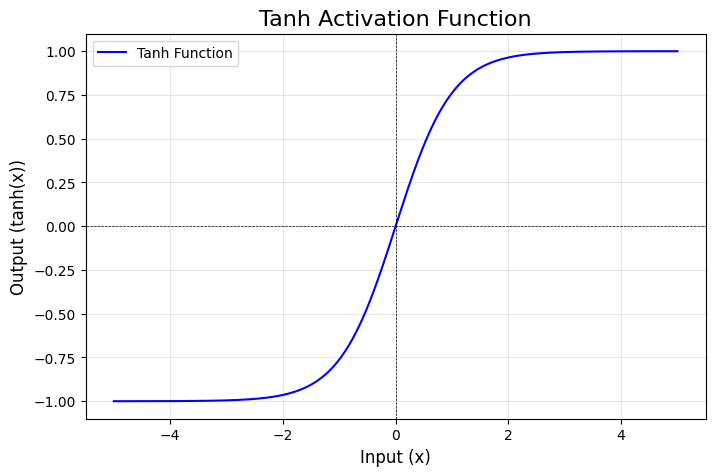

In [2]:
# Replotting the Tanh Activation Function

import numpy as np
import matplotlib.pyplot as plt

# Generate input values
x = np.linspace(-5, 5, 500)

# Compute Tanh values
tanh_values = np.tanh(x)

# Plot the Tanh graph
plt.figure(figsize=(8, 5))
plt.plot(x, tanh_values, label='Tanh Function', color='blue')
plt.title("Tanh Activation Function", fontsize=16)
plt.xlabel("Input (x)", fontsize=12)
plt.ylabel("Output (tanh(x))", fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


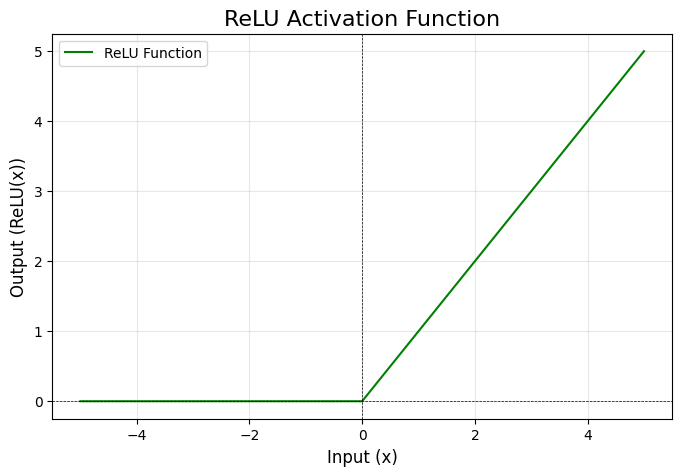

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input values for ReLU
x = np.linspace(-5, 5, 500)

# Compute ReLU values
relu_values = np.maximum(0, x)

# Plot the ReLU graph
plt.figure(figsize=(8, 5))
plt.plot(x, relu_values, label='ReLU Function', color='green')
plt.title("ReLU Activation Function", fontsize=16)
plt.xlabel("Input (x)", fontsize=12)
plt.ylabel("Output (ReLU(x))", fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Create Sample Data
# Features: [Size (sq. ft.), Bedrooms, Age]
X = np.array([
    [1500, 3, 10],
    [2000, 4, 5],
    [1200, 2, 20],
    [1800, 3, 15],
    [1000, 2, 30]
])

# Target: House Prices (in thousands of dollars)
y = np.array([300, 400, 200, 350, 150])

# Normalize Data
X = X / np.max(X, axis=0)  # Scale inputs to 0-1 for better performance
y = y / 1000  # Scale target values (e.g., 300 -> 0.3)

# 2. Define the Neural Network Model
model = Sequential([
    Dense(16, input_dim=3, activation='relu'),  # Hidden Layer 1
    Dense(8, activation='relu'),               # Hidden Layer 2
    Dense(1, activation='linear')              # Output Layer
])

# 3. Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 4. Train the Model
history = model.fit(X, y, epochs=100, batch_size=1, verbose=0)

# 5. Test the Model
# Example: Predict house price for a house with size=1700, bedrooms=3, age=12
test_data = np.array([[1700, 3, 12]]) / np.max(X, axis=0)
predicted_price = model.predict(test_data)[0][0] * 1000  # Rescale back to original units
print(f"Predicted Price: ${predicted_price:.2f}k")

# 6. Evaluate Model Performance
loss, mae = model.evaluate(X, y, verbose=0)
print(f"Mean Absolute Error: ${mae * 1000:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Price: $96964.89k
Mean Absolute Error: $13.48
